# Tiny CNN Model Version 1


In [46]:
# Libraries

import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


In [48]:
# === LOAD DATA ===
dataset = "dataset_grayscale_binary_balanced.npz"
data = np.load(dataset, allow_pickle=True)
X_train, y_train = data["X_train"], data["y_train"]
X_val, y_val = data["X_val"], data["y_val"]
X_test, y_test = data["X_test"], data["y_test"]
label_names = data["label_names"]
num_classes = len(label_names)
img_size = (96, 96)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"Label names: {label_names}")    

X_train shape: (2501, 96, 96, 1), y_train shape: (2501,)
x_val shape: (536, 96, 96, 1), y_val shape: (536,)
X_test shape: (536, 96, 96, 1), y_test shape: (536,)
Label names: ['NO_THREAT' 'THREAT']


In [53]:
# === BUILD LIGHTWEIGHT CNN ===
model = models.Sequential([
    layers.Conv2D(8, (3, 3), activation='relu', input_shape=(96, 96, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),

    layers.Dense(num_classes, activation='softmax')
])

print(model.summary())

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 94, 94, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 47, 47, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 45, 45, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 22, 22, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 20, 20, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,954 (23.26 KB)

 Trainable params: 5,954 (23.26 KB)

 Non-trainable params: 0 (0.00 B)

None


In [54]:
# === COMPILE ===
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# === TRAIN ===
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=16,
    validation_data=(X_val, y_val)
)

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5482 - loss: 0.6832 - val_accuracy: 0.5858 - val_loss: 0.6671
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5987 - loss: 0.6531 - val_accuracy: 0.5858 - val_loss: 0.6657
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5892 - loss: 0.6624 - val_accuracy: 0.6063 - val_loss: 0.6584
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6034 - loss: 0.6495 - val_accuracy: 0.5858 - val_loss: 0.6555
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6079 - loss: 0.6471 - val_accuracy: 0.6306 - val_loss: 0.6385
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6257 - loss: 0.6329 - val_accuracy: 0.6306 - val_loss: 0.6455
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6528 - loss: 0.6312 - val_accuracy: 0.6698 - val_loss: 0.6129
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6493 - loss: 0.6176 - val_accu

In [34]:
# === SAVE TF LITE MODEL ===

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("weapon_detector.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ Training complete. Model saved as weapon_detector.tflite")


INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpqlpr4uk8\assets


INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpqlpr4uk8\assets


Saved artifact at 'C:\Users\user\AppData\Local\Temp\tmpqlpr4uk8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 96, 96, 1), dtype=tf.float32, name='keras_tensor_32')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  1382152988496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1382025304336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1382025304144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1382025303568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1382025304912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1382025304528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1382025305296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1382025305104: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ Training complete. Model saved as weapon_detector.tflite


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


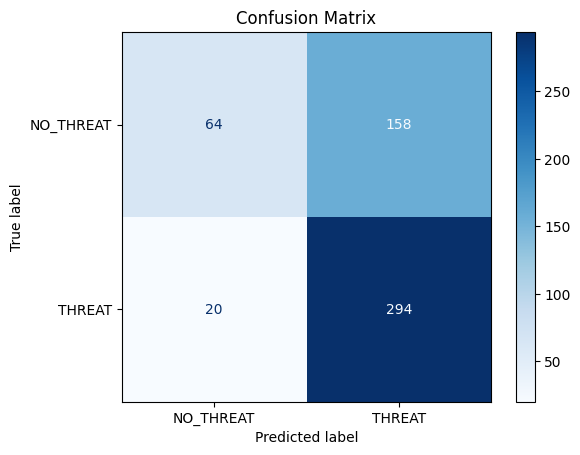

In [56]:
# === EVALUATE MODEL ===

# Step 1: Get predictions for the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 2: Convert y_test to integer labels if one-hot encoded
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# Step 3: Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 4: Display confusion matrix with sklearn's built-in tool
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()


In [57]:
# Classification Report
print(classification_report(y_true, y_pred, target_names=label_names))

              precision    recall  f1-score   support

   NO_THREAT       0.76      0.29      0.42       222
      THREAT       0.65      0.94      0.77       314

    accuracy                           0.67       536
   macro avg       0.71      0.61      0.59       536
weighted avg       0.70      0.67      0.62       536



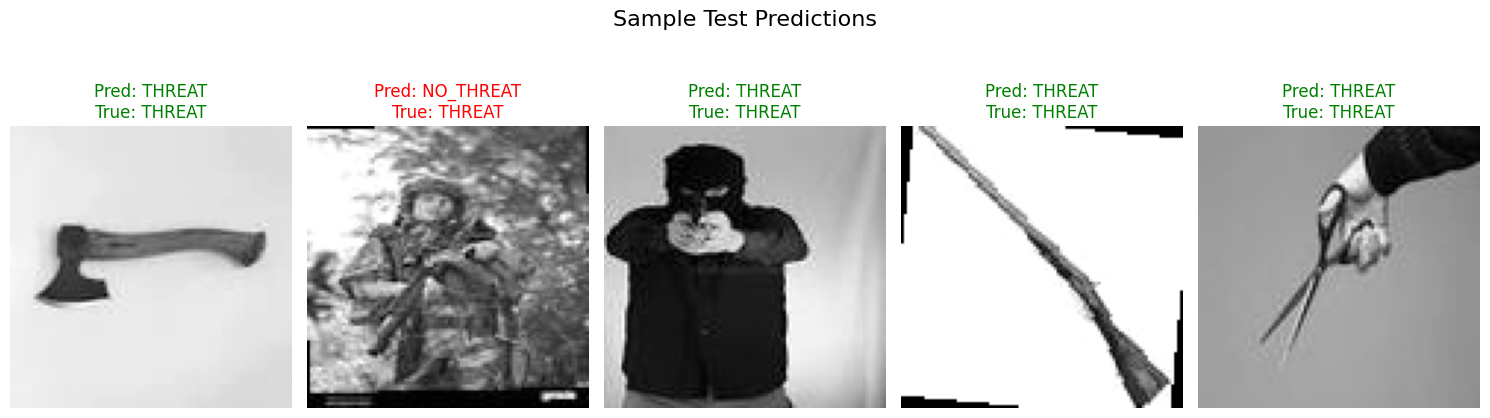

In [52]:
# Pick 5 random indices from test set
indices = random.sample(range(len(X_test)), 5)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    img = X_test[idx].reshape(img_size[0], img_size[1])  # Grayscale
    true_label = label_names[y_true[idx]]
    pred_label = label_names[y_pred[idx]]
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color="green" if pred_label == true_label else "red")
    plt.axis('off')

plt.suptitle("Sample Test Predictions", fontsize=16)
plt.tight_layout()
plt.show()
